In [3]:
import pastaq as pq
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

# file name and location of the example file
exampleFile = "3_2_extract.mzML"
# exampleFile = "/mnt/e/data/projects/pastaqtesting/testData/3_2.mzML"

# load example file
# lcmsData = pq.read_mzml(file_name = exampleFile, min_mz = 600, max_mz = 900, min_rt = 1500, max_rt = 2500, instrument_type = 'ORBITRAP', resolution_ms1 = 70000, resolution_msn = 17500, reference_mz = 200, fwhm_rt = 9, polarity = '+', ms_level = 1)
lcmsData = pq.read_mzml(file_name = exampleFile, min_mz = 0, max_mz = 1300, min_rt = 0, max_rt = 6000, instrument_type = 'ORBITRAP', resolution_ms1 = 70000, resolution_msn = 17500, reference_mz = 200, fwhm_rt = 9, polarity = '+', ms_level = 1)
# lcmsDataGrid = pq.resample(lcmsData, num_mz = 10, num_rt = 10, smoothing_coef_mz = 0.5, smoothing_coef_rt = 0.5)
params = pq.default_parameters(instrument = 'orbitrap', avg_fwhm_rt = 9)
params['resolution_msn'] = 17500
# peaks = pq.detect_peaks(params, os.getcwd(), save_grid=False, logger=None, force_override=False)
print(params)
print(os.getcwd())

{'instrument_type': 'orbitrap', 'resolution_ms1': 70000, 'resolution_msn': 17500, 'reference_mz': 200, 'avg_fwhm_rt': 9, 'num_samples_mz': 5, 'num_samples_rt': 5, 'smoothing_coefficient_mz': 0.4, 'smoothing_coefficient_rt': 0.4, 'warp2d_slack': 30, 'warp2d_window_size': 100, 'warp2d_num_points': 2000, 'warp2d_rt_expand_factor': 0.2, 'warp2d_peaks_per_window': 100, 'metamatch_fraction': 0.7, 'metamatch_n_sig_mz': 1.5, 'metamatch_n_sig_rt': 1.5, 'feature_detection_charge_states': [5, 4, 3, 2, 1], 'max_peaks': 1000000, 'polarity': 'both', 'min_mz': 0, 'max_mz': 100000, 'min_rt': 0, 'max_rt': 100000, 'link_n_sig_mz': 3, 'link_n_sig_rt': 3, 'ident_max_rank_only': True, 'ident_require_threshold': True, 'ident_ignore_decoy': True, 'similarity_num_peaks': 2000, 'qc_plot_palette': 'husl', 'qc_plot_extension': 'png', 'qc_plot_fill_alpha': 'dynamic', 'qc_plot_line_alpha': 0.5, 'qc_plot_scatter_alpha': 0.3, 'qc_plot_scatter_size': 2, 'qc_plot_min_dynamic_alpha': 0.1, 'qc_plot_per_file': False, 'qc

In [4]:
# print(dir(lcmsData))
print(lcmsData.dump)
print(dir(lcmsData.scans[10]))
print(lcmsData.scans[10].intensity[1:20])
# help(lcmsData.scans)

<bound method PyCapsule.dump of RawData:
> instrument_type: ORBITRAP
> resolution_ms1: 70000.000000
> resolution_msn: 17500.000000
> reference_mz: 200.000000
> min_mz: 591.591324
> max_mz: 613.646892
> min_rt: 3432.025200
> max_rt: 4042.833420
> number of scans: 780>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'intensity', 'ms_level', 'mz', 'num_points', 'polarity', 'precursor_information', 'retention_time', 'scan_number']
[159718.59375, 277558.4375, 322903.625, 216852.953125, 104825.6875, 38722.859375, 65511.78125, 101542.046875, 303730.8125, 380553.3125, 450089.625, 338696.53125, 187511.9375, 25709.08984375, 109808.65625, 122686.890625, 112374.453125, 82928.6875, 46060.796875]


In [5]:
print(dir(pq))

['DBSequence', 'Feature', 'FeatureCluster', 'FeatureId', 'Grid', 'IdentData', 'InferredProtein', 'Instrument', 'LinkedMsms', 'LinkedPsm', 'Peak', 'PeakCluster', 'PeakId', 'Peptide', 'PeptideEvidence', 'PeptideModification', 'Polarity', 'PrecursorInformation', 'RawData', 'RawPoints', 'Scan', 'Similarity', 'SpectrumMatch', 'TimeMap', 'Xic', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_custom_log', 'calculate_similarity_matrix', 'calculate_time_map', 'colors', 'create_quantitative_tables', 'datetime', 'dda_pipeline', 'dda_pipeline_summary', 'default_parameters', 'detect_features', 'detect_peaks', 'find_feature_clusters', 'find_peak_clusters', 'find_peaks', 'find_protein_groups', 'find_sequence_consensus', 'find_similarity', 'generate_qc_plots', 'gridspec', 'json', 'link_idents', 'link_peaks', 'link_peaks_msms_idents', 'link_psm', 'logging', 'match_peaks_and_features', 'np', 'os', 'parse_mzidentml_files', 'parse_raw

In [6]:
grid = pq.resample(
            lcmsData,
            params['num_samples_mz'],
            params['num_samples_rt'],
            params['smoothing_coefficient_mz'],
            params['smoothing_coefficient_rt'],
)

In [7]:
peaks = pq.find_peaks(lcmsData, grid, 1000)
# print(grid.data[0:200])
print(peaks[1:10])

[Peak <id: 1, local_max_mz: 598.970836, local_max_rt: 3658.383540, local_max_height: 50349059.810958, fitted_height: 56742480.704929, fitted_mz: 598.969973, fitted_rt: 3659.096159, fitted_sigma_mz: 0.005458, fitted_sigma_rt: 8.632278, fitted_volume: 16796186.345031>, Peak <id: 2, local_max_mz: 598.802061, local_max_rt: 3688.923951, local_max_height: 49052630.069639, fitted_height: 54459070.628283, fitted_mz: 598.802136, fitted_rt: 3688.257103, fitted_sigma_mz: 0.005434, fitted_sigma_rt: 11.271494, fitted_volume: 20956816.394806>, Peak <id: 3, local_max_mz: 611.291355, local_max_rt: 3575.744781, local_max_height: 36742945.086336, fitted_height: 41396472.256266, fitted_mz: 611.291457, fitted_rt: 3575.356300, fitted_sigma_mz: 0.005632, fitted_sigma_rt: 6.926551, fitted_volume: 10146850.877724>, Peak <id: 4, local_max_mz: 611.041049, local_max_rt: 3575.744781, local_max_height: 28575220.734070, fitted_height: 31989857.376181, fitted_mz: 611.040906, fitted_rt: 3575.184073, fitted_sigma_mz: 

{'img_plot': <Axes: xlabel='m/z', ylabel='retention time (s)'>,
 'mz_plot': <Axes: ylabel='Intensity'>,
 'rt_plot': <Axes: xlabel='Intensity'>}

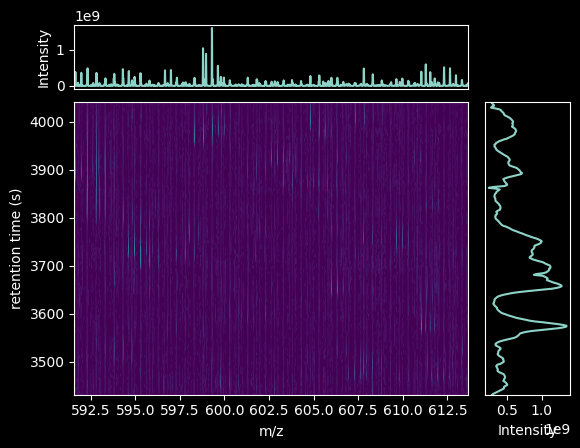

In [8]:
pq.plot_mesh(grid, transform='sqrt', figure=None)